In [1]:
import gdown

train_id = '1XtZ-XQ8ImNFf40D-bFqTm0UVFqNKhbLi'
gdown.download(f'https://drive.google.com/uc?id={train_id}',output='train.zip',quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1XtZ-XQ8ImNFf40D-bFqTm0UVFqNKhbLi
From (redirected): https://drive.google.com/uc?id=1XtZ-XQ8ImNFf40D-bFqTm0UVFqNKhbLi&confirm=t&uuid=322e20f4-dbb6-4230-bec6-6e008176203b
To: /content/train.zip
100%|██████████| 8.89G/8.89G [03:09<00:00, 46.9MB/s]


'train.zip'

In [2]:
test_id = '1pe4_HgXb9dctFGJXVNlyNcKSXZeht0lX'
gdown.download(f'https://drive.google.com/uc?id={test_id}',output='test.zip',quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1pe4_HgXb9dctFGJXVNlyNcKSXZeht0lX
From (redirected): https://drive.google.com/uc?id=1pe4_HgXb9dctFGJXVNlyNcKSXZeht0lX&confirm=t&uuid=ca51b924-4e43-4db4-ac8f-ca19531ab55d
To: /content/test.zip
100%|██████████| 2.51G/2.51G [00:55<00:00, 45.0MB/s]


'test.zip'

In [4]:
test_id = '1hwz6X-Zp7JpJL35K6P3z7k6O_PTXhUcT'
gdown.download(f'https://drive.google.com/uc?id={test_id}',output='valid.zip',quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1hwz6X-Zp7JpJL35K6P3z7k6O_PTXhUcT
From (redirected): https://drive.google.com/uc?id=1hwz6X-Zp7JpJL35K6P3z7k6O_PTXhUcT&confirm=t&uuid=8d54d091-d8d4-4093-92f8-c4e34616790f
To: /content/valid.zip
100%|██████████| 1.27G/1.27G [00:28<00:00, 44.0MB/s]


'valid.zip'

In [7]:
import zipfile

with zipfile.ZipFile('train.zip','r') as zip_ref:
  zip_ref.extractall('train_data')
  import os
print(os.listdir('train_data'))

['train']


In [8]:
import zipfile
import os

with zipfile.ZipFile('test.zip','r') as zip_ref:
  zip_ref.extractall('test_data')
print(os.listdir('test_data'))

['test']


In [9]:
import zipfile
import os

with zipfile.ZipFile('valid.zip','r') as zip_ref:
  zip_ref.extractall('valid_data')
print(os.listdir('valid_data'))

['validation']


In [10]:
import xml.etree.ElementTree as ET

folders = {
    "train": "train_data/train",
    # "valid": "valid_data/validation",
    "test":  "test_data/test"
}

all_classes = set()
for folder_name, data_dir in folders.items():
    if not os.path.exists(data_dir):
        print(f"Directory not found: {data_dir}, skipping.")
        continue
    for file in os.listdir(data_dir):
        if file.endswith(".xml"):
            tree = ET.parse(os.path.join(data_dir, file))
            root = tree.getroot()
            for obj in root.findall('object'):
                name = obj.find('name').text.strip()
                all_classes.add(name)

all_classes = sorted(list(all_classes))
class2id = {cls: idx for idx, cls in enumerate(all_classes)}
print(class2id)


{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'الف': 10, 'ب': 11, 'ت': 12, 'ث': 13, 'ج': 14, 'د': 15, 'س': 16, 'ش': 17, 'ص': 18, 'ط': 19, 'ظ': 20, 'ع': 21, 'ق': 22, 'ل': 23, 'م': 24, 'ن': 25, 'ه\u200d': 26, 'و': 27, 'پ': 28, 'ژ (معلولین و جانبازان)': 29, 'کل ناحیه پلاک': 30, 'ی': 31}


In [16]:
from PIL import Image
import os

folders = {
    "train": "train_data/train",
    "valid": "valid_data/validation",
    "test": "test_data/test"
}

def convert_annotation(xml_path, img_path, class2id, txt_path):
    target_class = 'کل ناحیه پلاک'  # اسم دقیق کلاس پلاک
    tree = ET.parse(xml_path)
    root = tree.getroot()
    img = Image.open(img_path)
    w, h = img.size
    lines = []
    for obj in root.findall('object'):
        name = obj.find('name').text.strip()
        if name != target_class:
            continue  # فقط پلاک!
        class_id = 0  # چون فقط یک کلاس داریم، بذار ۰ باشه
        bndbox = obj.find('bndbox')
        xmin = int(float(bndbox.find('xmin').text))
        ymin = int(float(bndbox.find('ymin').text))
        xmax = int(float(bndbox.find('xmax').text))
        ymax = int(float(bndbox.find('ymax').text))
        x_center = ((xmin + xmax) / 2) / w
        y_center = ((ymin + ymax) / 2) / h
        bw = (xmax - xmin) / w
        bh = (ymax - ymin) / h
        lines.append(f"{class_id} {x_center} {y_center} {bw} {bh}")
    with open(txt_path, "w", encoding="utf-8") as f:
        f.write("\n".join(lines))

for part, data_dir in folders.items():
    for file in os.listdir(data_dir):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(data_dir, file)
            xml_path = os.path.splitext(img_path)[0] + ".xml"
            txt_path = os.path.splitext(img_path)[0] + ".txt"
            if os.path.exists(xml_path):
                convert_annotation(xml_path, img_path, class2id, txt_path)


Labels for day_06987.jpg:
0 0.4708333333333333 0.223828125 0.24444444444444444 0.05703125



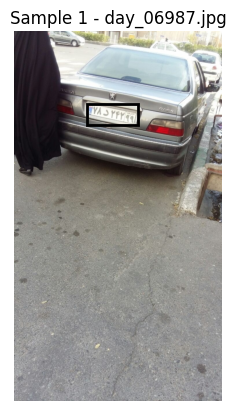

Labels for day_15851.jpg:
0 0.44305555555555554 0.256640625 0.2111111111111111 0.04453125



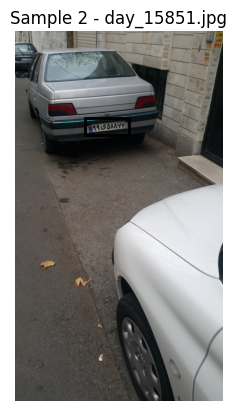

Labels for night (878).jpg:
0 0.539 0.4866666666666667 0.116 0.032



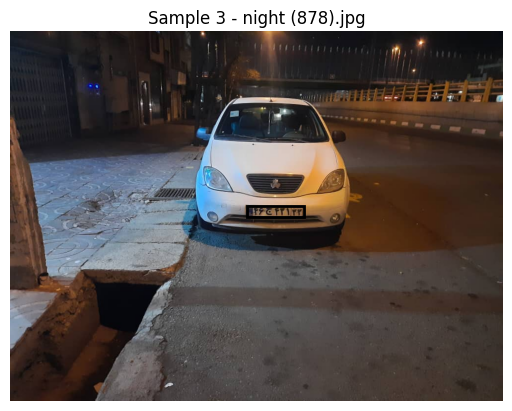

Labels for day_01897.jpg:
0 0.3963541666666667 0.1984375 0.18854166666666666 0.034375



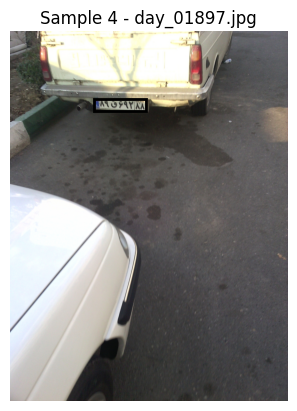

Labels for day_02124.jpg:
0 0.6791666666666667 0.56171875 0.1875 0.0515625



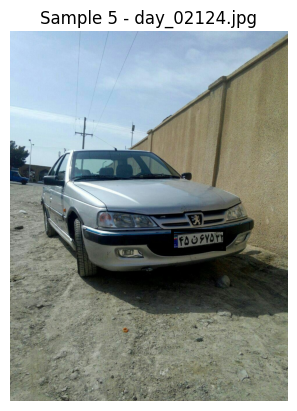

Labels for day_14286.jpg:
0 0.59765625 0.5027816411682893 0.296875 0.1571627260083449



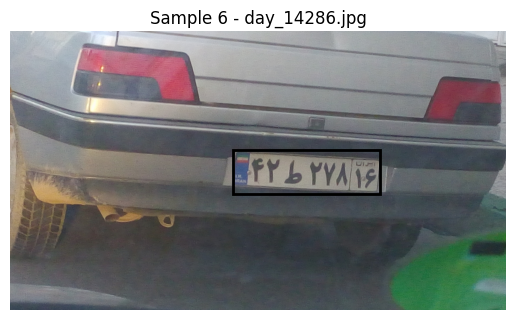

Labels for day_11392.jpg:
0 0.4741666666666667 0.69 0.255 0.05



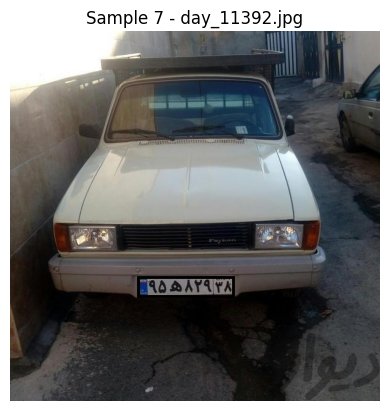

Labels for day_12762.jpg:
0 0.3423611111111111 0.2015625 0.05694444444444444 0.0109375
0 0.5631944444444444 0.262890625 0.12638888888888888 0.02421875



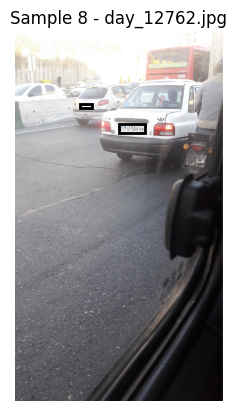

Labels for day_14341.jpg:
0 0.65703125 0.7858136300417247 0.128125 0.07510431154381085



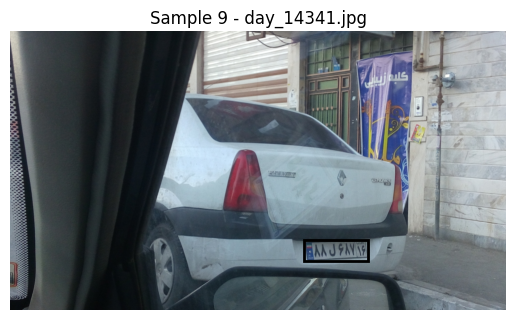

Labels for day_01165.jpg:
0 0.5098958333333333 0.52109375 0.30520833333333336 0.0546875
0 0.1140625 0.29765625 0.03229166666666667 0.00625



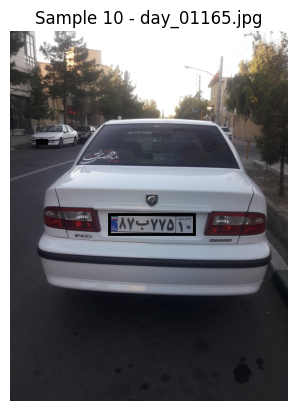

In [12]:
import matplotlib.pyplot as plt

def show_sample(data_dir, num_samples=5):
    samples = []
    # فقط فایل‌های عکس رو پیدا کن
    for file in os.listdir(data_dir):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(data_dir, file)
            txt_path = os.path.splitext(img_path)[0] + ".txt"
            if os.path.exists(txt_path):
                with open(txt_path, 'r', encoding='utf-8') as f:
                    lines = f.readlines()
                # فقط عکس‌هایی که لیبل دارند
                if lines:
                    samples.append((img_path, lines))
            if len(samples) >= num_samples:
                break

    for i, (img_path, lines) in enumerate(samples):
        img = Image.open(img_path)
        plt.figure()
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Sample {i+1} - {os.path.basename(img_path)}")
        print(f"Labels for {os.path.basename(img_path)}:\n{''.join(lines)}\n")

        w, h = img.size
        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            class_id, x_center, y_center, bw, bh = map(float, parts)
            # تبدیل مرکز و عرض به گوشه‌ها
            x1 = (x_center - bw / 2) * w
            y1 = (y_center - bh / 2) * h
            x2 = (x_center + bw / 2) * w
            y2 = (y_center + bh / 2) * h
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1,
                                              fill=False, lw=2))
        plt.show()

# مثال استفاده:
show_sample("train_data/train", num_samples=10)


In [13]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [17]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(
    data = '/content/plaque.yaml',
    epochs = 10,
    imgsz = 640,
    batch = 15,
    patience = 3

)

Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=15, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/plaque.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=3, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

train: Scanning /content/train_data/train.cache... 14671 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14671/14671 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 238.5±281.4 MB/s, size: 750.4 KB)


val: Scanning /content/valid_data/validation... 2120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2120/2120 [00:02<00:00, 823.81it/s]

val: New cache created: /content/valid_data/validation.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.24G      1.141       1.43      1.025          1        640: 100%|██████████| 979/979 [06:24<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:35<00:00,  2.02it/s]

                   all       2120       2494      0.905      0.849      0.883      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.92G      1.081     0.6825      1.003          1        640: 100%|██████████| 979/979 [06:28<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:31<00:00,  2.23it/s]

                   all       2120       2494      0.923      0.872      0.921      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.94G      1.043     0.6214     0.9923          1        640: 100%|██████████| 979/979 [06:19<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:32<00:00,  2.22it/s]

                   all       2120       2494      0.932      0.899      0.939      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.95G     0.9975     0.5902      0.977          1        640: 100%|██████████| 979/979 [06:17<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:32<00:00,  2.16it/s]

                   all       2120       2494      0.923      0.888      0.937      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.95G     0.9543     0.5506     0.9603          1        640: 100%|██████████| 979/979 [06:13<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:32<00:00,  2.18it/s]

                   all       2120       2494      0.925      0.902      0.947      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.95G     0.9161     0.5134     0.9474          1        640: 100%|██████████| 979/979 [06:10<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:31<00:00,  2.23it/s]

                   all       2120       2494      0.932      0.911      0.956      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.95G     0.8792     0.4885     0.9377          1        640: 100%|██████████| 979/979 [06:09<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:31<00:00,  2.23it/s]

                   all       2120       2494      0.929      0.923      0.962      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.96G     0.8546     0.4663     0.9264          1        640: 100%|██████████| 979/979 [06:03<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:30<00:00,  2.31it/s]


                   all       2120       2494      0.939      0.918      0.961      0.735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.98G     0.8248     0.4428     0.9159          1        640: 100%|██████████| 979/979 [06:04<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:31<00:00,  2.23it/s]

                   all       2120       2494      0.951      0.907      0.964      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.98G     0.7997     0.4205     0.9092          1        640: 100%|██████████| 979/979 [06:04<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:30<00:00,  2.30it/s]


                   all       2120       2494      0.941      0.917      0.963      0.752

10 epochs completed in 1.129 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:29<00:00,  2.39it/s]


                   all       2120       2494      0.941      0.917      0.963      0.752
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fc8684c8510>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [19]:
from google.colab import files

files.download('/content/runs/detect/train3/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
model = YOLO('/content/runs/detect/train3/weights/best.pt')
model.predict('/content/hard.jpg')
import os
print(os.listdir('/content/runs/detect/'))
print(os.listdir('/content/runs/detect/predict'))



image 1/1 /content/hard.jpg: 480x640 3 کل ناحیه پلاکs, 7.0ms
Speed: 2.2ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
['train', 'train3', 'train2']


FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/predict'

In [ ]:

metrics = model.val(data='/content/test_data/test',split = 'test')
